In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
# from matplotlib.mlab import rec2csv

import emcee
import corner

import _pickle as cPickle
# from astropy.io import ascii

In [2]:
cat = np.genfromtxt('../catRawMags20Aug/catDir_WILLMAN-1/sgCut_WILLMAN-1.dat',names=True)

In [3]:
xc = cat['xt1_f606w']
yc = cat['yt1_f606w']
m606 = cat['magZPT_f606w']
dm606 = cat['magZPTerr_f606w']
m814 = cat['magZPT_f814w']
dm814 = cat['magZPTerr_f814w']

In [4]:
print(min(xc),min(yc))

76.24024922353875 102.48795793315173


In [5]:
orientat = -144.6886745891795

In [6]:
theta = np.deg2rad(orientat)
c,s = np.cos(theta), np.sin(theta)

In [7]:
#IMAGE BOUNDARY
IMAGE = Path([ [220,4045],
              [4218,4248],
              [4099,98],
              [0,0],
              [220,4045]])

xpath = np.array([220,4218,4099,0])
ypath = np.array([4045,4248,98,0])

xgap = np.array([100,99,4157,4156])
ygap = np.array([2033,2077,2233,2184])

In [17]:
# x0=2146.71
# y0=2031.12

In [8]:
x0=0
y0=0

In [ ]:
yadd = 0
xadd = 0
x0T = c*(x0-(x0+xadd)) - s*(y0-(y0+yadd)) + x0
y0T = s*(x0-(x0+xadd)) + c*(y0-(y0+yadd)) + (y0+0)
xpT = c*(xpath-(x0+xadd)) - s*(ypath-(y0+yadd)) + x0
ypT = s*(xpath-(x0+xadd)) + c*(ypath-(y0+yadd)) + (y0+yadd)
xgT = c*(xgap-(x0+xadd)) - s*(ygap-(y0+yadd)) + x0
ygT = s*(xgap-(x0+xadd)) + c*(ygap-(y0+yadd)) + (y0+yadd)
xT = c*(xc-(x0+xadd)) - s*(yc-(y0+yadd)) + x0
yT = s*(xc-(x0+xadd)) + c*(yc-(y0+yadd)) + (y0+yadd)

In [12]:
min(yT)

-5624.719292167112

In [13]:
xgood = xT + 3250
ygood = yT + 5625

In [14]:
print(min(xgood),min(ygood))

6.4794944830318855 0.28070783288785606


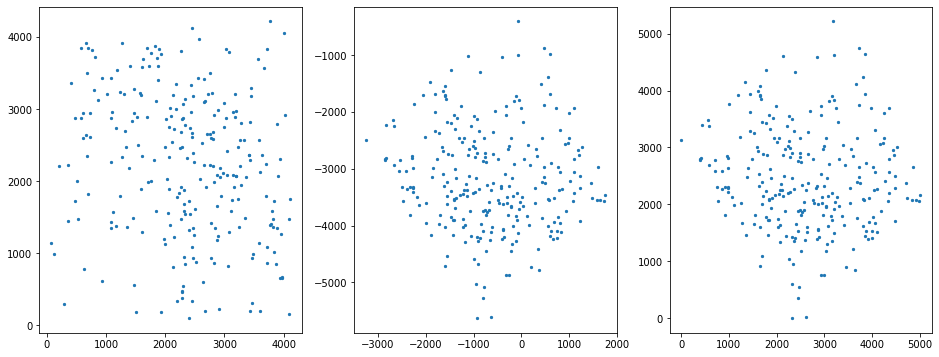

In [19]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,6))

ax1.scatter(xc,yc,s=5)
ax2.scatter(xT,yT,s=5)
ax3.scatter(xgood,ygood,s=5)
# ax2.plot(x0T,y0T,marker='o',color='red')

plt.show()